In [45]:
# ! pip install keras==2.1.1

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline

In [48]:
data= pd.read_csv('./fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [50]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
data.Usage.value_counts() 

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


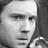

Angry


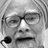

Angry


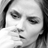

Fear


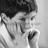

Sad


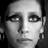

Neutral


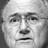

Fear


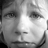

Sad


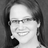

Happy


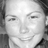

Happy


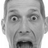

Fear


In [51]:
depth = 1
height = int(sqrt(len(data.pixels[0].split()))) 
width = int(height)
for i in range(0, 10): 
    array = np.mat(data.pixels[i]).reshape(height, width) 
    image = scipy.misc.toimage(array, cmin=0.0) 
    display(image)
    print(emotion_labels[data.emotion[i]]) 

In [68]:
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) / 255.0
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) / 255.0
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) / 255.0

# X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
# X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
# X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

print(X_test[0])

[0.6666667  0.4627451  0.39607844 ... 0.62352943 0.52156866 0.5137255 ]


In [74]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

print(X_train.shape)

(28709, 2304)


In [75]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [76]:
y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
print(y_test.value_counts())
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_test)

3    879
6    626
4    594
2    528
0    491
5    416
1     55
Name: emotion, dtype: int64
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [77]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=48*48, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=7, activation='softmax')) # 0~9 

In [78]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [79]:
history = model.fit(X_train, y_train, batch_size=100, epochs=200, validation_split=0.2) 

Train on 22967 samples, validate on 5742 samples
Epoch 1/200
22967/22967 [==============================] - 3s 121us/sample - loss: 1.7965 - categorical_accuracy: 0.3030 - val_loss: 1.8421 - val_categorical_accuracy: 0.2327
Epoch 2/200
22967/22967 [==============================] - 2s 83us/sample - loss: 1.6516 - categorical_accuracy: 0.3539 - val_loss: 1.6606 - val_categorical_accuracy: 0.3548
Epoch 3/200
22967/22967 [==============================] - 2s 84us/sample - loss: 1.5908 - categorical_accuracy: 0.3798 - val_loss: 1.6808 - val_categorical_accuracy: 0.3351
Epoch 4/200
22967/22967 [==============================] - 2s 83us/sample - loss: 1.5386 - categorical_accuracy: 0.3990 - val_loss: 1.6955 - val_categorical_accuracy: 0.3272
Epoch 5/200
22967/22967 [==============================] - 2s 84us/sample - loss: 1.4972 - categorical_accuracy: 0.4210 - val_loss: 1.6797 - val_categorical_accuracy: 0.3427
Epoch 6/200
22967/22967 [==============================] - 2s 82us/sample - loss

22967/22967 [==============================] - 2s 85us/sample - loss: 0.5376 - categorical_accuracy: 0.8030 - val_loss: 2.1377 - val_categorical_accuracy: 0.3410
Epoch 48/200
22967/22967 [==============================] - 2s 85us/sample - loss: 0.5488 - categorical_accuracy: 0.7991 - val_loss: 2.2958 - val_categorical_accuracy: 0.3400
Epoch 49/200
22967/22967 [==============================] - 2s 84us/sample - loss: 0.5330 - categorical_accuracy: 0.8093 - val_loss: 2.4470 - val_categorical_accuracy: 0.3535
Epoch 50/200
22967/22967 [==============================] - 2s 86us/sample - loss: 0.5190 - categorical_accuracy: 0.8147 - val_loss: 2.6790 - val_categorical_accuracy: 0.3346
Epoch 51/200
22967/22967 [==============================] - 2s 84us/sample - loss: 0.5160 - categorical_accuracy: 0.8124 - val_loss: 2.6631 - val_categorical_accuracy: 0.3210
Epoch 52/200
22967/22967 [==============================] - 2s 83us/sample - loss: 0.5075 - categorical_accuracy: 0.8165 - val_loss: 2.219

Epoch 94/200
22967/22967 [==============================] - 2s 83us/sample - loss: 0.3102 - categorical_accuracy: 0.8900 - val_loss: 3.1909 - val_categorical_accuracy: 0.3586
Epoch 95/200
22967/22967 [==============================] - 2s 83us/sample - loss: 0.3096 - categorical_accuracy: 0.8902 - val_loss: 3.2444 - val_categorical_accuracy: 0.3170
Epoch 96/200
22967/22967 [==============================] - 2s 84us/sample - loss: 0.3100 - categorical_accuracy: 0.8889 - val_loss: 3.8277 - val_categorical_accuracy: 0.3130
Epoch 97/200
22967/22967 [==============================] - 2s 83us/sample - loss: 0.3002 - categorical_accuracy: 0.8920 - val_loss: 3.2202 - val_categorical_accuracy: 0.3697
Epoch 98/200
22967/22967 [==============================] - 2s 82us/sample - loss: 0.3029 - categorical_accuracy: 0.8948 - val_loss: 2.8789 - val_categorical_accuracy: 0.3868
Epoch 99/200
22967/22967 [==============================] - 2s 82us/sample - loss: 0.2987 - categorical_accuracy: 0.8938 - va

22967/22967 [==============================] - 2s 82us/sample - loss: 0.2343 - categorical_accuracy: 0.9174 - val_loss: 3.6940 - val_categorical_accuracy: 0.3649
Epoch 141/200
22967/22967 [==============================] - 2s 82us/sample - loss: 0.2378 - categorical_accuracy: 0.9187 - val_loss: 4.1078 - val_categorical_accuracy: 0.3337
Epoch 142/200
22967/22967 [==============================] - 2s 87us/sample - loss: 0.2239 - categorical_accuracy: 0.9225 - val_loss: 2.9593 - val_categorical_accuracy: 0.3938
Epoch 143/200
22967/22967 [==============================] - 2s 85us/sample - loss: 0.2321 - categorical_accuracy: 0.9184 - val_loss: 3.7729 - val_categorical_accuracy: 0.3457
Epoch 144/200
22967/22967 [==============================] - 2s 84us/sample - loss: 0.2220 - categorical_accuracy: 0.9216 - val_loss: 3.6895 - val_categorical_accuracy: 0.3394
Epoch 145/200
22967/22967 [==============================] - 2s 83us/sample - loss: 0.2275 - categorical_accuracy: 0.9203 - val_loss: 

22967/22967 [==============================] - 2s 84us/sample - loss: 0.1876 - categorical_accuracy: 0.9346 - val_loss: 3.6487 - val_categorical_accuracy: 0.3788
Epoch 187/200
22967/22967 [==============================] - 2s 85us/sample - loss: 0.1881 - categorical_accuracy: 0.9362 - val_loss: 3.6922 - val_categorical_accuracy: 0.3436
Epoch 188/200
22967/22967 [==============================] - 2s 83us/sample - loss: 0.1869 - categorical_accuracy: 0.9349 - val_loss: 3.3771 - val_categorical_accuracy: 0.3541
Epoch 189/200
22967/22967 [==============================] - 2s 81us/sample - loss: 0.1833 - categorical_accuracy: 0.9359 - val_loss: 3.7584 - val_categorical_accuracy: 0.3941
Epoch 190/200
22967/22967 [==============================] - 2s 81us/sample - loss: 0.1839 - categorical_accuracy: 0.9385 - val_loss: 3.2746 - val_categorical_accuracy: 0.3837
Epoch 191/200
22967/22967 [==============================] - 2s 81us/sample - loss: 0.1921 - categorical_accuracy: 0.9332 - val_loss: 

In [81]:
result = model.evaluate(X_test, y_test, batch_size=64)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

3589/3589 [==============================] - 0s 28us/sample - loss: 3.8653 - categorical_accuracy: 0.3697
loss (cross-entropy) : 3.8653110639402612
test accuracy : 0.36974087


In [82]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

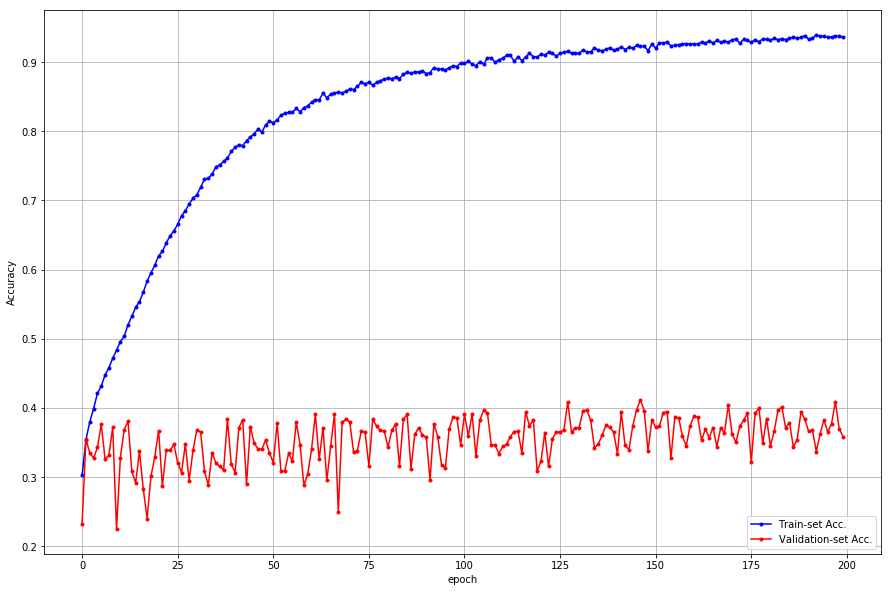

In [83]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()